Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Import gold price data:
stock of company- gold price- unit of oil price- silver- eur/usd

In [ ]:
data=pd.read_csv("/content/gld_price_data.csv")

In [ ]:
data[:5]

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
data.shape

(2290, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


no null values here

In [ ]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
positive and negative correlation

In [ ]:
correlation=data.corr()

<ipython-input-16-7f2487af4b08>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


<Axes: >

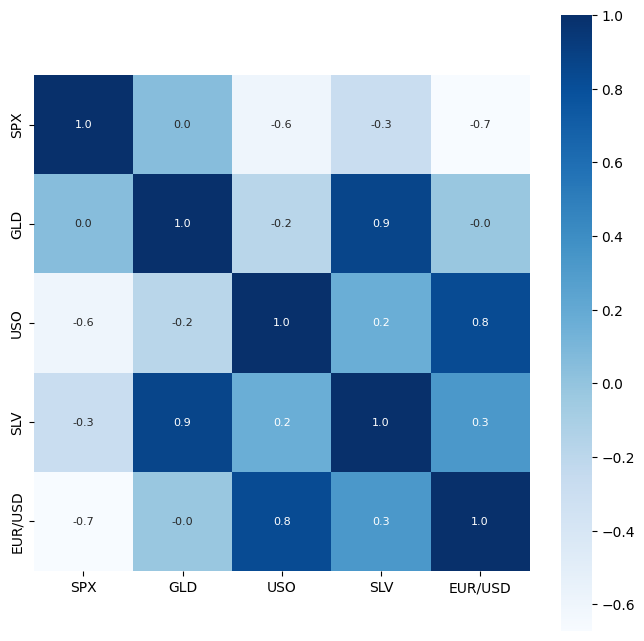

In [ ]:
plt.figure(figsize=(8,8))

sns.heatmap(correlation, cbar=True,square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap="Blues")

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-23-3f5bdf14e033>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

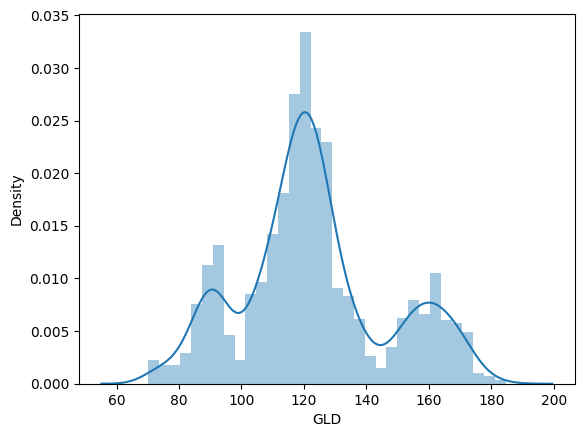

In [ ]:
sns.distplot(data['GLD'])

In [ ]:
# to drop column axis=1 and to drop row axis=0
x=data.drop(['Date','GLD'],axis=1)
y=data['GLD']

In [ ]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [ ]:
# train test splitting


In [ ]:
x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
x_train

,SPX,USO,SLV,EUR/USD
2280,2648.050049,13.800000,15.380000,1.208123
1730,2045.969971,13.350000,13.640000,1.076299
418,1102.349976,35.730000,17.090000,1.472949
979,1314.880005,31.100000,28.010000,1.257387
223,831.950012,32.330002,11.850000,1.296496
...,...,...,...,...
960,1354.579956,36.520000,28.379999,1.293661
905,1351.770020,38.689999,32.750000,1.323679
1096,1462.420044,33.820000,29.920000,1.319784
235,827.159973,26.910000,12.980000,1.291406


In [ ]:
x_train.shape

(1832, 4)

In [ ]:
rgr=RandomForestRegressor(n_estimators=100)


In [ ]:
rgr.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
test_pred=rgr.predict(x_test)

In [ ]:
test_pred

array([113.70600032, 149.54910005, 142.71999866, 112.69640201,
       113.57649955,  95.54499945, 111.81929979,  93.35629969,
       120.67330091, 127.21739943, 147.55469872, 120.44429899,
       118.95870059,  88.18870082,  96.1072002 ,  92.64669882,
       116.56460071,  88.96299899, 125.22890056, 114.71570025,
       118.64739941, 152.49800252, 122.50719801, 120.05929999,
       171.17389985, 108.34009857, 120.48120044,  87.16619851,
        88.04350073,  88.56689922, 121.32520043, 154.43480214,
       149.68889887, 125.99720006, 126.88380011,  90.8811989 ,
       158.25059942, 121.54070143, 106.78650097, 144.03679724,
        92.58399976, 127.77460053, 117.43850071, 152.66720129,
       119.38669971,  91.36450126,  79.70919977, 120.33910159,
       132.15069991, 119.12729935, 127.26790073, 165.8550006 ,
       153.26650076,  92.7194994 , 148.88520122, 152.38819893,
       112.98250073, 112.93130031,  87.21879939, 127.71339877,
       125.27280066, 151.69510319, 114.38309986, 110.62

In [ ]:
# r-squared error
error_score=metrics.r2_score(y_test,test_pred)
print(error_score)

0.9883800958163568


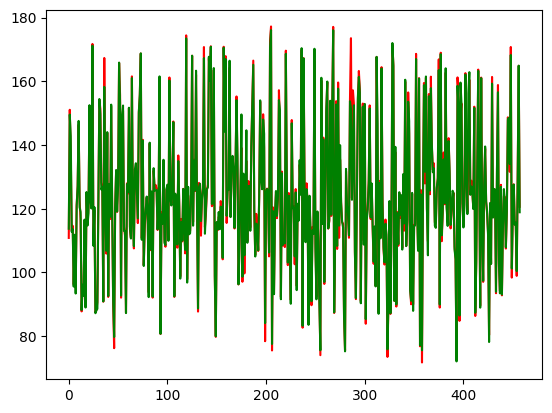

In [ ]:
y_test_=list(y_test)
plt.plot(y_test_,color='red',label="Actual")
plt.plot(test_pred,color='green',label="Predicted")
plt.show()